# Topic Modelling By Grouping Multiple Similar Products

In [1]:
import pandas as pd
import pickle
import numpy as np

In [2]:
# Read the preprocessed data file
df_huge = pd.read_pickle('../Clean_data')
df_huge.head()
df_huge.shape

(19525627, 5)

In [3]:
# Selection of product- product with maximum review data
df_grouped = df_huge.groupby(['asin']).agg({'reviewText': ' ** '.join,'asin':'size'}).rename(columns={'asin':'count'}).reset_index()
df_grouped.sort_values(by = 'count',ascending=False,inplace=True)
df_grouped.head(30)


,asin,reviewText,count
580956,B00FLYWNYQ,This is my first pressure cooker so I wasn't r...,22704
836347,B00Q7EV29G,This mattress shipped free via 2 day Prime Shi...,15201
551006,B00EINBSJ2,I received my pillow on time as stated on Frid...,14856
409335,B009HVH4XO,i have 4 of these and i didn't think they coul...,14649
742237,B00LV4W8BI,The sheets are very soft and comfortable right...,13507
790907,B00NX47YP4,"I love this little scale. It's simple, easy to...",12971
1102682,B019D9HESO,LOVE this cup! Keeps my drink from getting wat...,11770
420105,B009ZJ2M7G,My unreliable Bissell 2x scrubber recently bro...,10518
391650,B00902X68W,The sheets are some of the softest and most c...,10026
503326,B00COK3FD8,The tupperware was exactly as described. I lov...,9171


In [4]:
df_grouped.head(50)

,asin,reviewText,count
580956,B00FLYWNYQ,This is my first pressure cooker so I wasn't r...,22704
836347,B00Q7EV29G,This mattress shipped free via 2 day Prime Shi...,15201
551006,B00EINBSJ2,I received my pillow on time as stated on Frid...,14856
409335,B009HVH4XO,i have 4 of these and i didn't think they coul...,14649
742237,B00LV4W8BI,The sheets are very soft and comfortable right...,13507
790907,B00NX47YP4,"I love this little scale. It's simple, easy to...",12971
1102682,B019D9HESO,LOVE this cup! Keeps my drink from getting wat...,11770
420105,B009ZJ2M7G,My unreliable Bissell 2x scrubber recently bro...,10518
391650,B00902X68W,The sheets are some of the softest and most c...,10026
503326,B00COK3FD8,The tupperware was exactly as described. I lov...,9171


In [5]:
df_Sheets =  df_huge.loc[df_huge['asin'].isin(["B00LV4W8BI",'B00902X68W',"B00NLLUNSE", "B00635VODS"])]

In [6]:
df_Sheets.shape

(37618, 5)

In [7]:
df_Sheets['overall'].describe()

count    37618.000000
mean         4.277872
std          1.245247
min          1.000000
25%          4.000000
50%          5.000000
75%          5.000000
max          5.000000
Name: overall, dtype: float64

In [8]:
df_Sheets['overall'].value_counts()

5.0    25456
4.0     4715
1.0     2832
3.0     2723
2.0     1892
Name: overall, dtype: int64

## Preparing the dataframe with review sentences


In [9]:
# Preapre a data frame by spliiting reviews into sentences
df_sentences = pd.DataFrame(df_Sheets.reviewText.str.split('.').tolist(), index=df_Sheets.reviewerID).stack()
df_sentences = df_sentences.reset_index([0, 'reviewerID'])
df_sentences.columns = ['reviewerID', 'sentences']

df_sentences


,reviewerID,sentences
0,AQDRWVTBXGNIZ,"This is a fine comforter, super soft and fluff..."
1,AQDRWVTBXGNIZ,\nI especially like the price was not high but...
2,AQDRWVTBXGNIZ,I am comparing it to both a 'down' and anothe...
3,AQDRWVTBXGNIZ,"""Down"" is difficult to clean and expensive as..."
4,AQDRWVTBXGNIZ,We'll see how it holds up in the wash and dry
...,...,...
134073,AGLA12LDPFWU4,These sheets are light and comfortable! They f...
134074,AGLA12LDPFWU4,"They are not too heavy, which is a sign that ..."
134075,AGLA12LDPFWU4,At this price point it was easy to order seve...
134076,AGLA12LDPFWU4,I ordered the additional pillowcases for each...


In [10]:
# Merging the 50 reviews dataframe having all columns with new sentences dataframe
df_full = df_Sheets.merge(df_sentences, how='inner', left_on='reviewerID', right_on='reviewerID')
df_full

# #  Removed unneccesary columns 
# df_50p_5800r = df_50p_5800r.drop(["reviewText", "rev_date", "product_ID"], axis=1)
# df_50p_5800r = df_50p_5800r

# df_B00ETP7D3E_full.head()

,overall,reviewerID,asin,reviewText,rev_date,sentences
0,5.0,AQDRWVTBXGNIZ,B00635VODS,"This is a fine comforter, super soft and fluff...",2011-11-28,"This is a fine comforter, super soft and fluff..."
1,5.0,AQDRWVTBXGNIZ,B00635VODS,"This is a fine comforter, super soft and fluff...",2011-11-28,\nI especially like the price was not high but...
2,5.0,AQDRWVTBXGNIZ,B00635VODS,"This is a fine comforter, super soft and fluff...",2011-11-28,I am comparing it to both a 'down' and anothe...
3,5.0,AQDRWVTBXGNIZ,B00635VODS,"This is a fine comforter, super soft and fluff...",2011-11-28,"""Down"" is difficult to clean and expensive as..."
4,5.0,AQDRWVTBXGNIZ,B00635VODS,"This is a fine comforter, super soft and fluff...",2011-11-28,We'll see how it holds up in the wash and dry
...,...,...,...,...,...,...
136563,5.0,AGLA12LDPFWU4,B00NLLUNSE,These sheets are light and comfortable! They f...,2018-08-12,These sheets are light and comfortable! They f...
136564,5.0,AGLA12LDPFWU4,B00NLLUNSE,These sheets are light and comfortable! They f...,2018-08-12,"They are not too heavy, which is a sign that ..."
136565,5.0,AGLA12LDPFWU4,B00NLLUNSE,These sheets are light and comfortable! They f...,2018-08-12,At this price point it was easy to order seve...
136566,5.0,AGLA12LDPFWU4,B00NLLUNSE,These sheets are light and comfortable! They f...,2018-08-12,I ordered the additional pillowcases for each...


In [11]:
df_full.iloc[134079]['sentences']

" Otherwise, they're soft and the tan color is matches the photo"

## LDA Modeling

In [12]:
import time

import re
import numpy as np
import pandas as pd
from pprint import pprint

# Gensim
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# spacy for lemmatization
import spacy

# Plotting tools
import pyLDAvis
import pyLDAvis.gensim  # don't skip this
import matplotlib.pyplot as plt
%matplotlib inline

# Enable logging for gensim - optional
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.ERROR)

import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

unable to import 'smart_open.gcs', disabling that module


In [13]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use'])

In [14]:
# Get sentences from the data frame
list_sentences = df_sentences.sentences.values.tolist()
print(list_sentences[:1], len(list_sentences))

['This is a fine comforter, super soft and fluffy but not too hot at night'] 134078


In [15]:
def sent_to_words(sentences):
    for sentence in sentences:
        yield(gensim.utils.simple_preprocess(str(sentence), deacc=True))  # deacc=True removes punctuations

list_sentences_tokenized = list(sent_to_words(list_sentences))
list_sentences_tokenized_copy = list(sent_to_words(list_sentences))
print(list_sentences_tokenized_copy[:1])

[['this', 'is', 'fine', 'comforter', 'super', 'soft', 'and', 'fluffy', 'but', 'not', 'too', 'hot', 'at', 'night']]


In [16]:
# Build the bigram and trigram models

start_time = time.time()

bigram = gensim.models.Phrases(list_sentences_tokenized, min_count=5, threshold=100) # higher threshold fewer phrases.
trigram = gensim.models.Phrases(bigram[list_sentences_tokenized], threshold=100)  

# Faster way to get a sentence clubbed as a trigram/bigram
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)

# See trigram example
print(trigram_mod[bigram_mod[list_sentences_tokenized[0]]])

print("--- %s seconds ---" % (time.time() - start_time))

['this', 'is', 'fine', 'comforter', 'super', 'soft', 'and', 'fluffy', 'but', 'not', 'too', 'hot', 'at', 'night']
--- 12.095656156539917 seconds ---


In [17]:
# Define functions for stopwords, bigrams, trigrams and lemmatization
def remove_stopwords(texts):
    return [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]

def make_bigrams(texts):
    return [bigram_mod[doc] for doc in texts]

def make_trigrams(texts):
    return [trigram_mod[bigram_mod[doc]] for doc in texts]

def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

In [18]:
# Remove Stop Words
data_words_nostops = remove_stopwords(list_sentences_tokenized)
data_words_nostops[:1]

[['fine', 'comforter', 'super', 'soft', 'fluffy', 'hot', 'night']]

In [19]:
# Form Bigrams
data_words_bigrams = make_bigrams(data_words_nostops)
data_words_bigrams[:1]


[['fine', 'comforter', 'super', 'soft', 'fluffy', 'hot', 'night']]

In [20]:
start_time = time.time()

nlp = spacy.load('en', disable=['parser', 'ner'])

# # Do lemmatization keeping only noun, adj, vb, adv
data_lemmatized = lemmatization(data_words_bigrams, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV'])

print(data_lemmatized[:1])
print("--- %s seconds ---" % (time.time() - start_time))

[['fine', 'comforter', 'super', 'soft', 'fluffy', 'hot', 'night']]
--- 224.05514192581177 seconds ---


In [21]:
#  For Text Blob
from nltk.tokenize.treebank import TreebankWordDetokenizer
list_sentences_lemetised = []
for i in range(len(data_lemmatized)):
    lem_sen = TreebankWordDetokenizer().detokenize(data_lemmatized[i])
    list_sentences_lemetised.append(lem_sen)

In [22]:
list_sentences_lemetised

['fine comforter super soft fluffy hot night',
 'especially price high let low price fool nicely make high quality',
 'compare alternative comforter also',
 'difficult expensive clean warm cozy light',
 'see hold dry',
 'also arrive quickly',
 'good',
 'order',
 'show promptly however king',
 'ship seem order',
 '',
 'expect thick fluffy comforter',
 '',
 'nervous',
 '',
 'good price would cost ship back decide give try',
 '',
 'turn love fact super thick way fit washer feel smothered blanket',
 '',
 'still manage give extraordinary warmth leg get warm run hot',
 '',
 'perfect hubby happier get great price boot',
 'know want comforter even know love seriously wait snuggle bed soft buy sheet set go feel millionaire eye finally flutter comfort',
 '',
 '',
 'soft warm',
 'nice high quality comforter',
 'really soft appear well make',
 'would actually recomme would keep truely king',
 'regular low profile king sized bed barely make box_spring past mattress',
 'would perfect sized bed',
 'w

In [23]:
import pickle
with open('list_sentences_lemetised_Sheets.pkl', 'wb') as f:
    pickle.dump(list_sentences_lemetised, f)

In [24]:
# Create Dictionary
id2word = corpora.Dictionary(data_lemmatized)

# Create Corpus
texts = data_lemmatized

# Term Document Frequency
corpus = [id2word.doc2bow(text) for text in texts]

# View
print(corpus[:1])

[[(0, 1), (1, 1), (2, 1), (3, 1), (4, 1), (5, 1), (6, 1)]]


In [25]:
id2word[0]


'comforter'

In [26]:
# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=3, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=100,
                                           passes=10,
                                           alpha='auto',
                                           per_word_topics=True)

In [27]:
# Print the Keyword in the 10 topics
pprint(lda_model.print_topics())
doc_lda = lda_model[corpus]

[(0,
  '0.154*"soft" + 0.056*"good" + 0.044*"comfortable" + 0.039*"nice" + '
  '0.037*"fit" + 0.026*"well" + 0.024*"super" + 0.022*"purchase" + '
  '0.021*"really" + 0.019*"make"'),
 (1,
  '0.070*"great" + 0.049*"color" + 0.044*"price" + 0.044*"quality" + '
  '0.041*"star" + 0.033*"wash" + 0.026*"would" + 0.024*"get" + 0.022*"order" + '
  '0.021*"look"'),
 (2,
  '0.202*"sheet" + 0.045*"love" + 0.041*"buy" + 0.038*"feel" + 0.037*"set" + '
  '0.030*"bed" + 0.020*"thin" + 0.016*"mattress" + 0.014*"product" + '
  '0.013*"sleep"')]


In [28]:
# Compute Perplexity
print('\nPerplexity: ', lda_model.log_perplexity(corpus))  # a measure of how good the model is. lower the better.

# Compute Coherence Score
coherence_model_lda = CoherenceModel(model=lda_model, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_lda = coherence_model_lda.get_coherence()
print('\nCoherence Score: ', coherence_lda)


Perplexity:  -6.105583198452926

Coherence Score:  0.2622397872066436


In [29]:
# Visualize the topics
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim.prepare(lda_model, corpus, id2word)
vis


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
2     -0.377071  0.018208       1        1  40.401203
1      0.172599 -0.332211       2        1  31.653849
0      0.204472  0.314003       3        1  27.944950, topic_info=       Term          Freq         Total Category  logprob  loglift
80    sheet  40679.000000  40679.000000  Default  30.0000  30.0000
5      soft  21413.000000  21413.000000  Default  29.0000  29.0000
64    great  11052.000000  11052.000000  Default  28.0000  28.0000
30     good   7728.000000   7728.000000  Default  27.0000  27.0000
380   color   7760.000000   7760.000000  Default  26.0000  26.0000
..      ...           ...           ...      ...      ...      ...
175   money   1151.632935   1152.378418   Topic3  -4.7932   1.2743
277  corner   1097.525513   1098.256714   Topic3  -4.8413   1.2743
176   worth   1107.730103   1108.504395   Topic3  -4.8321   1.2742
24     warm    949.883728    950.606750   Topic3  -4.9858   1.2742
236    need   1034.984253   1035.784302   Topic3  -4.9000   1.2742

[122 rows x 6 columns], token_table=      Topic      Freq       Term
term                            
16        3  0.999690       also
153       3  0.999391    amazing
1069      2  0.999632         be
161       3  0.999280  beautiful
68        1  0.999899        bed
...     ...       ...        ...
166       2  0.999906       wash
55        2  0.999302        way
87        3  0.999855       well
176       3  0.999545      worth
46        2  0.999880      would

[93 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[3, 2, 1])

## LDA Mallet Model

In [30]:
mallet_path = 'mallet-2.0.8/bin/mallet' # update this path


In [31]:
ldamallet = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=5, id2word=id2word)

# Show Topics
pprint(ldamallet.show_topics(formatted=False))

# Compute Coherence Score
coherence_model_ldamallet = CoherenceModel(model=ldamallet, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
coherence_ldamallet = coherence_model_ldamallet.get_coherence()
print('\nCoherence Score: ', coherence_ldamallet)
# 0- quality of cooking, 1-good appliance, 2-functionalities 3-product design, 5-how likely to recommend

[(0,
  [('star', 0.14686502687813224),
   ('great', 0.14118603550583067),
   ('price', 0.09836304287153103),
   ('good', 0.09235641738159667),
   ('quality', 0.08411702605297965),
   ('color', 0.07007729738256743),
   ('nice', 0.046342025749614726),
   ('product', 0.03833319176303559),
   ('sheet', 0.019609508670169522),
   ('amazing', 0.018857163659309055)]),
 (1,
  [('soft', 0.23981194982130435),
   ('love', 0.12989614065385816),
   ('comfortable', 0.07073469094049076),
   ('warm', 0.04252716413614449),
   ('super', 0.038473531457628746),
   ('sleep', 0.03373629800196685),
   ('feel', 0.02958672135472884),
   ('perfect', 0.022462881677100574),
   ('light', 0.020555995298745532),
   ('night', 0.020196205416037033)]),
 (2,
  [('buy', 0.09898185251994528),
   ('set', 0.09047105967240106),
   ('wash', 0.05459982324669193),
   ('sheet', 0.04742073340516459),
   ('order', 0.04635537100035109),
   ('time', 0.030217551845619302),
   ('cover', 0.016125712763767994),
   ('hold', 0.016065180808

In [32]:
# ldamallet_3topics = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=3, id2word=id2word)

# # Show Topics
# pprint(ldamallet_3topics.show_topics(formatted=False))

# # Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=ldamallet_3topics, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

In [33]:
# ldamallet_4topics = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=4, id2word=id2word)

# # Show Topics
# pprint(ldamallet_4topics.show_topics(formatted=False))

# # Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=ldamallet_4topics, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)
# # 0 - great product, 1- features and fucntions, 2-review after few days, 3-things to cook

In [34]:
# ldamallet_6topics = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=6, id2word=id2word)

# # Show Topics
# pprint(ldamallet_6topics.show_topics(formatted=False))

# # Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=ldamallet_6topics, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

In [35]:
# ldamallet_10topics = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=10, id2word=id2word)

# # Show Topics
# pprint(ldamallet_10topics.show_topics(formatted=False))

# # Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=ldamallet_10topics, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

In [36]:
# ldamallet_15topics = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=15, id2word=id2word)

# # Show Topics
# pprint(ldamallet_15topics.show_topics(formatted=False))

# # Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=ldamallet_15topics, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

In [37]:
# ldamallet_20topics = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=20, id2word=id2word)

# # Show Topics
# pprint(ldamallet_20topics.show_topics(formatted=False))

# # Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=ldamallet_20topics, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

In [38]:
# ldamallet_25topics = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=25, id2word=id2word)

# # Show Topics
# pprint(ldamallet_25topics.show_topics(formatted=Tr))

# # Compute Coherence Score
# coherence_model_ldamallet = CoherenceModel(model=ldamallet_25topics, texts=data_lemmatized, dictionary=id2word, coherence='c_v')
# coherence_ldamallet = coherence_model_ldamallet.get_coherence()
# print('\nCoherence Score: ', coherence_ldamallet)

#### Finding optimal number of topics

In [39]:
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=3):
    """
    Compute c_v coherence for various number of topics

    Parameters:
    ----------
    dictionary : Gensim dictionary
    corpus : Gensim corpus
    texts : List of input texts
    limit : Max num of topics

    Returns:
    -------
    model_list : List of LDA topic models
    coherence_values : Coherence values corresponding to the LDA model with respective number of topics
    """
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [40]:

model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_lemmatized, start=3, limit=25, step=5)

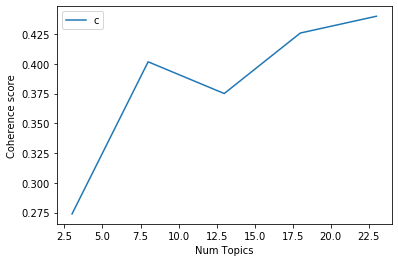

In [41]:
# Show graph
limit=25; start=3; step=5;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

#### Finding Dominant Topic in each Sentence

In [42]:
def format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_lemmatized):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row in enumerate(ldamodel[corpus]):
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)

In [43]:
df_topic_sents_keywords = format_topics_sentences(ldamodel=ldamallet, corpus=corpus, texts=data_lemmatized)

In [44]:

# Format
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [45]:
# Show
df_dominant_topic

,Document_No,Dominant_Topic,Topic_Perc_Contrib,Keywords,Text
0,0,1.0,0.2671,"soft, love, comfortable, warm, super, sleep, f...","[fine, comforter, super, soft, fluffy, hot, ni..."
1,1,0.0,0.2542,"star, great, price, good, quality, color, nice...","[especially, price, high, let, low, price, foo..."
2,2,4.0,0.2243,"sheet, feel, thin, purchase, comforter, make, ...","[compare, alternative, comforter, also]"
3,3,1.0,0.2500,"soft, love, comfortable, warm, super, sleep, f...","[difficult, expensive, clean, warm, cozy, light]"
4,4,2.0,0.2308,"buy, set, wash, sheet, order, time, cover, hol...","[see, hold, dry]"
...,...,...,...,...,...
134073,134073,1.0,0.2401,"soft, love, comfortable, warm, super, sleep, f...","[sheet, light, comfortable, feel, great, skin]"
134074,134074,2.0,0.2182,"buy, set, wash, sheet, order, time, cover, hol...","[heavy, sign, thick, thread, inflate]"
134075,134075,0.0,0.2241,"star, great, price, good, quality, color, nice...","[price, point, easy, order, several, complimen..."
134076,134076,2.0,0.2407,"buy, set, wash, sheet, order, time, cover, hol...","[order, additional, pillowcase, set]"


## Sentiment Analysis using Text Blob

In [46]:
from textblob import TextBlob
# Get the polarity score using below function
def get_textBlob_score(sent):
    # This polarity score is between -1 to 1
    polarity = TextBlob(sent).sentiment.polarity
    return polarity

In [47]:
len(list_sentences_lemetised)

134078

In [48]:
# Prepare sentiment scores for all sentences from text blob
texblog_senti_scores= []
for sentence in list_sentences_lemetised:
    texblog_score = get_textBlob_score(sentence)
    texblog_senti_scores.append(texblog_score)

In [49]:
len(texblog_senti_scores)

134078

In [50]:
texblog_senti_scores[30000], list_sentences_lemetised[30000]

(0.016666666666666666, 'crush old duvet bit dust put order long possible')

## Combine Sentiment Analysis with LDA

In [51]:
df_full['topics'] = df_dominant_topic['Dominant_Topic'].astype(float)

In [52]:
df_full['sentiment_scores'] = np.resize(texblog_senti_scores,len(df_full))



In [53]:
df_full

,overall,reviewerID,asin,reviewText,rev_date,sentences,topics,sentiment_scores
0,5.0,AQDRWVTBXGNIZ,B00635VODS,"This is a fine comforter, super soft and fluff...",2011-11-28,"This is a fine comforter, super soft and fluff...",1.0,0.180000
1,5.0,AQDRWVTBXGNIZ,B00635VODS,"This is a fine comforter, super soft and fluff...",2011-11-28,\nI especially like the price was not high but...,0.0,0.184000
2,5.0,AQDRWVTBXGNIZ,B00635VODS,"This is a fine comforter, super soft and fluff...",2011-11-28,I am comparing it to both a 'down' and anothe...,4.0,0.000000
3,5.0,AQDRWVTBXGNIZ,B00635VODS,"This is a fine comforter, super soft and fluff...",2011-11-28,"""Down"" is difficult to clean and expensive as...",1.0,0.027778
4,5.0,AQDRWVTBXGNIZ,B00635VODS,"This is a fine comforter, super soft and fluff...",2011-11-28,We'll see how it holds up in the wash and dry,2.0,-0.066667
...,...,...,...,...,...,...,...,...
136563,5.0,AGLA12LDPFWU4,B00NLLUNSE,These sheets are light and comfortable! They f...,2018-08-12,These sheets are light and comfortable! They f...,NaN,-0.075000
136564,5.0,AGLA12LDPFWU4,B00NLLUNSE,These sheets are light and comfortable! They f...,2018-08-12,"They are not too heavy, which is a sign that ...",NaN,0.011111
136565,5.0,AGLA12LDPFWU4,B00NLLUNSE,These sheets are light and comfortable! They f...,2018-08-12,At this price point it was easy to order seve...,NaN,0.000000
136566,5.0,AGLA12LDPFWU4,B00NLLUNSE,These sheets are light and comfortable! They f...,2018-08-12,I ordered the additional pillowcases for each...,NaN,0.000000


In [54]:
df_full['sentiment_scores'].describe()

count    136568.000000
mean          0.200552
std           0.317961
min          -1.000000
25%           0.000000
50%           0.100000
75%           0.416667
max           1.000000
Name: sentiment_scores, dtype: float64

In [55]:
texblog_senti_scores
sentiments_textblob = []
for each in texblog_senti_scores:
    if(each >=0.4):
        a=1
    else:
        a=0
    sentiments_textblob.append(a)

In [56]:
df_full['sentiment'] = np.resize(sentiments_textblob,len(df_full))


In [57]:
df_full

,overall,reviewerID,asin,reviewText,rev_date,sentences,topics,sentiment_scores,sentiment
0,5.0,AQDRWVTBXGNIZ,B00635VODS,"This is a fine comforter, super soft and fluff...",2011-11-28,"This is a fine comforter, super soft and fluff...",1.0,0.180000,0
1,5.0,AQDRWVTBXGNIZ,B00635VODS,"This is a fine comforter, super soft and fluff...",2011-11-28,\nI especially like the price was not high but...,0.0,0.184000,0
2,5.0,AQDRWVTBXGNIZ,B00635VODS,"This is a fine comforter, super soft and fluff...",2011-11-28,I am comparing it to both a 'down' and anothe...,4.0,0.000000,0
3,5.0,AQDRWVTBXGNIZ,B00635VODS,"This is a fine comforter, super soft and fluff...",2011-11-28,"""Down"" is difficult to clean and expensive as...",1.0,0.027778,0
4,5.0,AQDRWVTBXGNIZ,B00635VODS,"This is a fine comforter, super soft and fluff...",2011-11-28,We'll see how it holds up in the wash and dry,2.0,-0.066667,0
...,...,...,...,...,...,...,...,...,...
136563,5.0,AGLA12LDPFWU4,B00NLLUNSE,These sheets are light and comfortable! They f...,2018-08-12,These sheets are light and comfortable! They f...,NaN,-0.075000,0
136564,5.0,AGLA12LDPFWU4,B00NLLUNSE,These sheets are light and comfortable! They f...,2018-08-12,"They are not too heavy, which is a sign that ...",NaN,0.011111,0
136565,5.0,AGLA12LDPFWU4,B00NLLUNSE,These sheets are light and comfortable! They f...,2018-08-12,At this price point it was easy to order seve...,NaN,0.000000,0
136566,5.0,AGLA12LDPFWU4,B00NLLUNSE,These sheets are light and comfortable! They f...,2018-08-12,I ordered the additional pillowcases for each...,NaN,0.000000,0


In [58]:
 df_full['topics'].value_counts()

0.0    54380
1.0    25990
2.0    20706
4.0    17385
3.0    15617
Name: topics, dtype: int64

In [59]:
topic_wise_sentiment_counts = df_full.groupby(['asin','topics'])['sentiment'].value_counts()
topic_wise_sentiment_counts

asin        topics  sentiment
B00635VODS  0.0     0             6887
                    1             3231
            1.0     0             3168
                    1             2060
            2.0     0             3228
                    1              672
            3.0     0             2225
                    1              727
            4.0     0             2779
                    1              788
B00902X68W  0.0     0            10452
                    1             4918
            1.0     0             4754
                    1             3090
            2.0     0             4926
                    1             1090
            3.0     0             3225
                    1              987
            4.0     0             4080
                    1             1227
B00LV4W8BI  0.0     0            12680
                    1             5857
            1.0     0             5197
                    1             2908
            2.0     0             

In [60]:
total_sentiment = df_full.groupby(['asin','topics'])['sentiment'].count()
total_sentiment

asin        topics
B00635VODS  0.0       10118
            1.0        5228
            2.0        3900
            3.0        2952
            4.0        3567
B00902X68W  0.0       15370
            1.0        7844
            2.0        6016
            3.0        4212
            4.0        5307
B00LV4W8BI  0.0       18537
            1.0        8105
            2.0        6566
            3.0        5129
            4.0        5371
B00NLLUNSE  0.0       10355
            1.0        4813
            2.0        4224
            3.0        3324
            4.0        3140
Name: sentiment, dtype: int64

In [61]:
total_sentiment.loc['B00635VODS'][0], topic_wise_sentiment_counts['B00635VODS'][0][0]
# , topic_wise_sentiment_counts[0][1]

(10118, 6887)

In [62]:
results = []
ratings= []
product_ids = ['B00635VODS', 'B00902X68W', 'B00LV4W8BI', 'B00NLLUNSE']
for i in range(len(product_ids)):
    for j in range(5):
        value = topic_wise_sentiment_counts[product_ids[i]][j][0]/total_sentiment.loc[product_ids[i]][j]
        results.append(value)
        if (value >0.75):
            ratings.append(5)
        elif (value >0.7):
            ratings.append(4)
        elif (value >0.5):
            ratings.append(3)
        elif (value >0.4):
            ratings.append(2)
        else: ratings.append(1)
results, ratings

([0.6806681162285037,
  0.6059678653404744,
  0.8276923076923077,
  0.7537262872628726,
  0.7790860667227362,
  0.6800260247234873,
  0.6060683324834268,
  0.8188164893617021,
  0.7656695156695157,
  0.7687959299039006,
  0.6840373307439176,
  0.6412091301665639,
  0.8314042034724337,
  0.7504386820042893,
  0.7715509216160864,
  0.6936745533558667,
  0.6760856014959484,
  0.8340435606060606,
  0.7617328519855595,
  0.7719745222929937],
 [3, 3, 5, 5, 5, 3, 3, 5, 5, 5, 3, 3, 5, 5, 5, 3, 3, 5, 5, 5])

In [63]:
product_ids_tmp =  [5, 5, 3, 4, 4, 5, 5, 2, 4, 4, 5, 5, 3, 4, 5, 5, 5, 3, 5, 5]
product_id_topics = [[],[],[],[],[]]
for i in range(len(product_ids_tmp)):
    product_id_topics[int(i%5)].append(product_ids_tmp[i])
product_id_topics

[[5, 5, 5, 5], [5, 5, 5, 5], [3, 2, 3, 3], [4, 4, 4, 5], [4, 4, 5, 5]]

In [64]:
b = [[],[]]

In [65]:
b[0].append(1)
b

[[1], []]

# Results

### Topic wise product rating

In [118]:
topics = ['Softnest and comfort', 'Fit', 'Quality', 'Recommendation', 'After wash quality']
products = {'comforter':'B00635VODS','sheets-1':'B00902X68W',
           'sheets-2':'B00LV4W8BI',
           'sheets-3': 'B00NLLUNSE'}

In [67]:
Product_Summary = pd.DataFrame({'productID':product_ids,
                                topics[0]: product_id_topics[0],
                                topics[1]: product_id_topics[1],
                                topics[2]: product_id_topics[2],
                                topics[3]: product_id_topics[3],
                                topics[4]: product_id_topics[4]})
Product_Summary

,productID,Softnest and comfort,Fit,Quality,Recommendation,After wash quality
0,B00635VODS,5,5,3,4,4
1,B00902X68W,5,5,2,4,4
2,B00LV4W8BI,5,5,3,4,5
3,B00NLLUNSE,5,5,3,5,5


## Product Wise Summary

In [177]:
def get_n_sentimental_sentences(n, sentiment, sentences):
    print("\033[1m"+ "Most "+ sentiment+" sentences are: " + "\033[0m")
    print("")
    for i in range(len(sentences.index)):
        print(i,") ",df_full.iloc[sentences.index[i]]['sentences'])

def get_product_summary(product_name):
    product_id = products[product_name]
    product_df = df_full[df_full['asin']==product_id]
    print("\033[1m" + "Product summary for "+ product_name + "\033[0m")
    print("")
    print("\033[1m" + "Topic wise rating is..."+ "\033[0m")
    print("")
    product_rating = Product_Summary[Product_Summary['productID']==product_id]
    product_rating = product_rating.drop(['productID'], axis=1)
    print(product_rating.T)
    print("")
    Most_negative_sentences =  product_df.nsmallest(5, 'sentiment_scores')['sentences']
    Most_positive_sentences = product_df.nlargest(5, 'sentiment_scores')['sentences']
    get_n_sentimental_sentences(5, "positive", Most_positive_sentences )
    get_n_sentimental_sentences(5, "negative", Most_negative_sentences )


In [179]:
# Product name can be given here which fetches productID from the dictionary created above
get_product_summary("comforter")

Product summary for comforter

Topic wise rating is...

                      0
Softnest and comfort  5
Fit                   5
Quality               3
Recommendation        4
After wash quality    4

Most positive sentences are: 

0 )   It would be perfect for a Queen sized bed
1 )  nothing overly wonderful
2 )  This is an excellent duvet for people allergic to feathers
3 )    It looks wonderful with my duvet cover, doesn't 'pill' and the stitching keeps it from bunching
4 )  This duvet was the perfect weight
Most negative sentences are: 

0 )   Shipping issues aside (first one went AWOL, they shipped another without incident), I wish I'd never ordered it
1 )  Feels great even in the Texas weather
2 )    It barely covers the top of the bed
3 )   //great buy!
4 )  True size, I expected slightly thicker but it is a good price/ quality 
